In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks
%cd city-data

/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/city-data


## **工资水平处理**
原始数据折线图+补空值+处理后的折线图

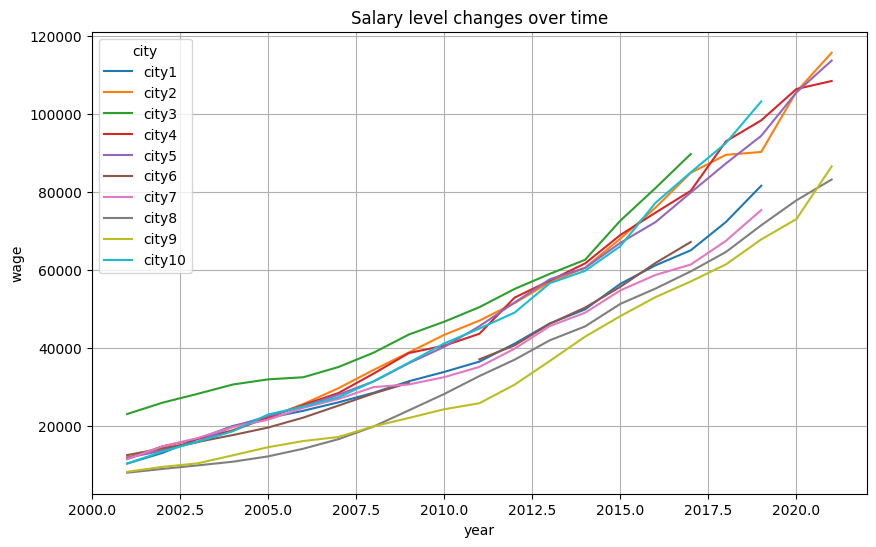

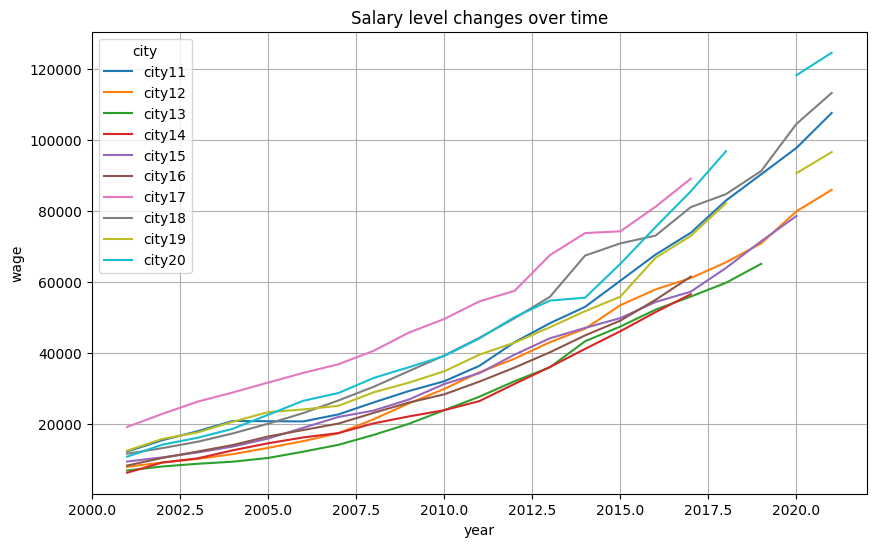

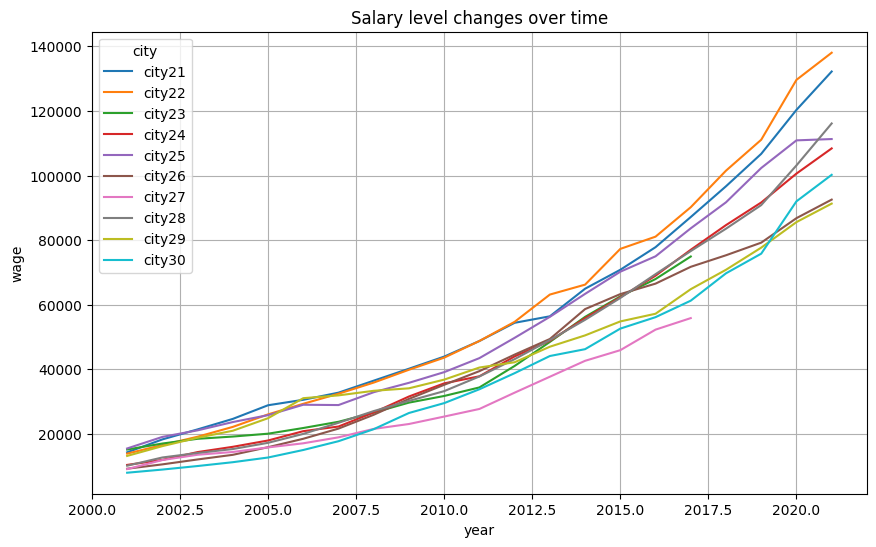

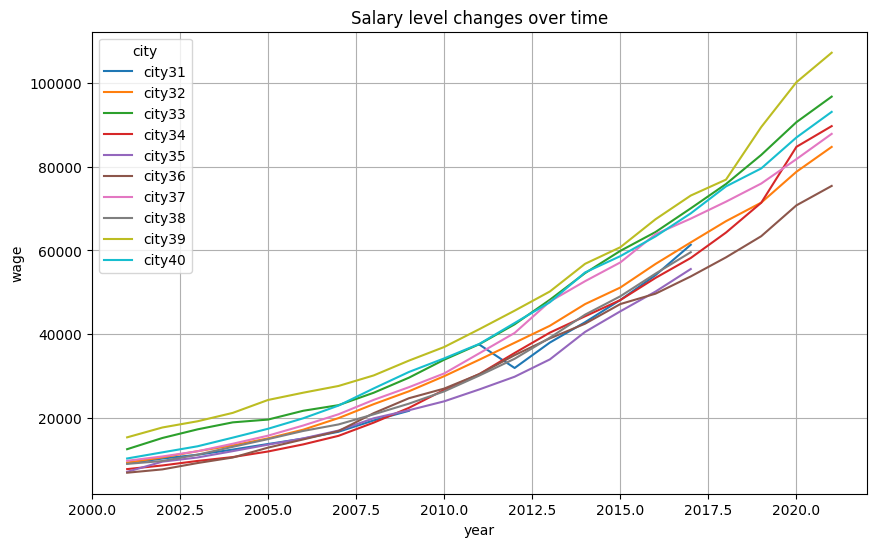

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '工资水平.xlsx'
wage_data = pd.read_excel(file_path)
wage_data['averageWage'] = wage_data['averageWage'].str.replace('年', '').astype(int)
wage_data.iloc[:, 1:] = wage_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


cities = ['city1', 'city2', 'city3', 'city4', 'city5', 'city6', 'city7', 'city8', 'city9', 'city10']
plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(wage_data['averageWage'], wage_data[city], label=city)
plt.title('Salary level changes over time')
plt.xlabel('year')
plt.ylabel('wage')
plt.legend(title='city')
plt.grid(True)
plt.show()

cities = ['city11', 'city12', 'city13', 'city14', 'city15', 'city16', 'city17', 'city18', 'city19', 'city20']
plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(wage_data['averageWage'], wage_data[city], label=city)
plt.title('Salary level changes over time')
plt.xlabel('year')
plt.ylabel('wage')
plt.legend(title='city')
plt.grid(True)
plt.show()

cities = ['city21', 'city22', 'city23', 'city24', 'city25', 'city26', 'city27', 'city28', 'city29', 'city30']
plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(wage_data['averageWage'], wage_data[city], label=city)
plt.title('Salary level changes over time')
plt.xlabel('year')
plt.ylabel('wage')
plt.legend(title='city')
plt.grid(True)
plt.show()

cities = ['city31', 'city32', 'city33', 'city34', 'city35', 'city36', 'city37', 'city38', 'city39', 'city40']
plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(wage_data['averageWage'], wage_data[city], label=city)
plt.title('Salary level changes over time')
plt.xlabel('year')
plt.ylabel('wage')
plt.legend(title='city')
plt.grid(True)
plt.show()

插值法：拉格朗日插值、样条插值、取平均

取平均效果最好

In [ ]:
import pandas as pd
from scipy.interpolate import lagrange

inputFile = '工资水平.xlsx'
outputFile = 'wage_lagrange.csv'

data = pd.read_excel(inputFile)
data = data.reset_index(drop=True)

# s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
def ployinterp_column(s, n, k=5):
    # 保证不越界
    low = max(0, n - k)
    high = min(len(s), n + k + 1)

    # 提取前后的非空数据进行插值
    y = pd.concat([s.iloc[low:n], s.iloc[n+1:high]])
    y = y[y.notnull()]
    #print(y)
    if len(y) < 2:  # 插值需要至少两个点，若不足则返回 None
        return None

    y_reset = y.reset_index(drop=True)
    return lagrange(y_reset.index, y_reset)(n - low)


# 逐个元素判断是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if pd.isnull(data[i].loc[j]):
            interpolated_value = ployinterp_column(data[i], j)

            if interpolated_value is not None:
                print(i,j)
                data[i].loc[j] = interpolated_value
            else:
                print(i,j)
                if j > 0:
                    data[i].loc[j] = 2 * data[i].loc[j-1] - data[i].loc[j-2]
                else:
                    data[i].loc[j] = 2 * data[i].loc[j+1] - data[i].loc[j+2]

data.to_csv(outputFile, index=False)
print(f"数据插值完成，结果已保存至 {outputFile}")


In [ ]:
import pandas as pd
from scipy.interpolate import CubicSpline

inputFile = '工资水平.xlsx'
outputFile = 'wage_cubicspline.csv'

data = pd.read_excel(inputFile)

data = data.reset_index(drop=True)
def spline_interp_column(s, n, k=5):
    low = max(0, n - k)
    high = min(len(s), n + k + 1)
    y = s.iloc[low:high]
    x = y.index
    y = y[y.notnull()]

    if len(y) < 2:
        return None
    x = y.index
    cs = CubicSpline(x, y)
    interp_value = cs(n)
    return max(0, interp_value)

for i in data.columns:
    for j in range(len(data)):
        if pd.isnull(data.loc[j, i]):
            interpolated_value = spline_interp_column(data[i], j)

            if interpolated_value is not None:
                data.loc[j, i] = interpolated_value
            else:
                if j > 0:
                    data.loc[j, i] = data.loc[j-1, i]
                else:
                    data.loc[j, i] = data.loc[j+1, i]

data.to_csv(outputFile, index=False)
print(f"数据插值完成，结果已保存至 {outputFile}")


数据插值完成，结果已保存至 wage_cubicspline.csv


In [ ]:
import pandas as pd

inputFile = '工资水平.xlsx'
outputFile = 'wage_linear.csv'

data = pd.read_excel(inputFile)
for column in data.columns:
    for j in range(len(data)):
        if pd.isnull(data.loc[j, column]):
            if j > 0 and j < len(data) - 1:
                # 如果前后值都不为空
                if pd.notnull(data.loc[j - 1, column]) and pd.notnull(data.loc[j + 1, column]):
                    print('linear',j,column)
                    data.loc[j, column] = (data.loc[j - 1, column] + data.loc[j + 1, column]) / 2
                # 如果后值为空
                elif pd.notnull(data.loc[j - 1, column]) and pd.isnull(data.loc[j + 1, column]):
                    print('no',j,column)
                    print(data.loc[j-1,column],data.loc[j-2,column])
                    data.loc[j, column] = 2 * data.loc[j - 1, column] - data.loc[j - 2, column]
            # 处理缺失值在最后一行
            elif j == len(data) - 1 and pd.notnull(data.loc[j - 1, column]):
                data.loc[j, column] = 2 * data.loc[j - 1, column] - data.loc[j - 2, column]

data.to_csv(outputFile, index=False)
print(f"数据填充完成，结果已保存至 {outputFile}")


回归：线性、多项式

多项式效果更好

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


file_path = '工资水平.xlsx'
wage_data = pd.read_excel(file_path)
wage_data['averageWage'] = wage_data['averageWage'].str.replace('年', '').astype(int)

predicted_data = wage_data.copy()

# 第一列年份作为自变量
x_years = wage_data.iloc[:, 0].values.reshape(-1, 1)

for col in wage_data.columns[1:]:
    y = wage_data[col].values
    nan_indices = np.where(pd.isnull(y))[0]
    if len(nan_indices) == len(y):
        continue

    x_known = np.delete(x_years, nan_indices, axis=0)
    y_known = np.delete(y, nan_indices)
    if len(y_known) < 2:
        continue

    model = LinearRegression()
    model.fit(x_known, y_known)

    for idx in nan_indices:
        y[idx] = model.predict([[x_years[idx][0]]])[0]

    predicted_data[col] = y

predicted_data.to_csv('wage_linear_predicted.csv', index=False)
print("预测后的数据已保存到 'wage_linear_predicted.csv'")



预测后的数据已保存到 'wage_linear_predicted.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
file_path = '工资水平.xlsx'
wage_data = pd.read_excel(file_path)
wage_data['averageWage'] = wage_data['averageWage'].str.replace('年', '').astype(int)

predicted_data = wage_data.copy()

x_years = wage_data.iloc[:, 0].values.reshape(-1, 1)

for col in wage_data.columns[1:]:
    y = wage_data[col].values
    nan_indices = np.where(pd.isnull(y))[0]
    if len(nan_indices) == len(y):
        continue

    x_known = np.delete(x_years, nan_indices, axis=0)
    y_known = np.delete(y, nan_indices)
    if len(y_known) < 2:
        continue

    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_known)

    model = LinearRegression()
    model.fit(x_poly, y_known)

    for idx in nan_indices:
        y[idx] = model.predict(poly.transform([[x_years[idx][0]]]))[0]

    predicted_data[col] = y

predicted_data.to_csv('wage_polynomial_predicted.csv', index=False)
print("使用多项式回归预测后的数据已保存到 'wage_polynomial_predicted.csv'")


使用多项式回归预测后的数据已保存到 'wage_polynomial_predicted.csv'


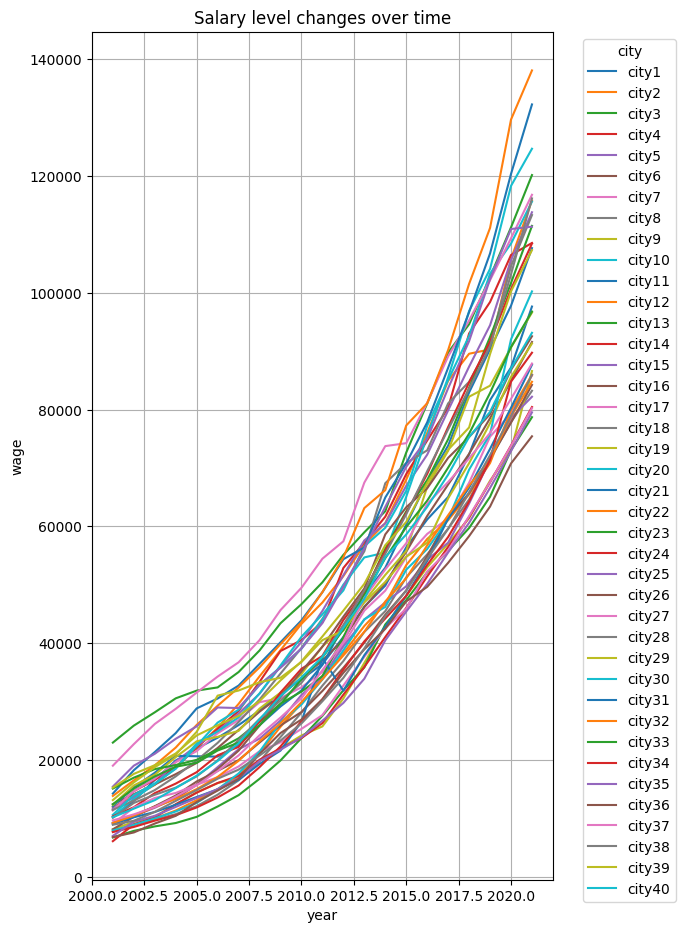

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_done = 'wage_polynomial_predicted.csv'
wage_data_done = pd.read_csv(file_path_done)

cities = wage_data_done.columns[1:]

plt.figure(figsize=(7, 10))
for city in cities:
    plt.plot(wage_data_done['averageWage'], wage_data_done[city], label=city)
plt.title('Salary level changes over time')
plt.xlabel('year')
plt.ylabel('wage')
plt.legend(title='city', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# **年龄结构**

各个城市各个年份年龄结构饼状图

各年龄段比例*总人口=各年龄段人数随时间变化折线图

空值暂未想到填补方法，均补0

In [ ]:
import pandas as pd

age_structure_file = '年龄结构.xlsx'
population_scale_file = '人口规模.xlsx'

age_data = pd.read_excel(age_structure_file)
population_data = pd.read_excel(population_scale_file)

age_data_sorted = age_data.sort_values(by=['城市', '年份']).reset_index(drop=True)

population_dict = {(row['城市名称'], row['年份']): row['常住人口（万人）'] for _, row in population_data.iterrows()}
age_data_sorted['常住人口'] = age_data_sorted.apply(
    lambda x: population_dict.get((x['城市'], x['年份']), 0), axis=1
)

output_file = 'age.csv'
age_data_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"处理完成，数据已保存至 {output_file}")


处理完成，数据已保存至 age.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

age_data = pd.read_csv('age.csv')
age_data.fillna(0, inplace=True)

cities = age_data['城市'].unique()

fig, axs = plt.subplots(len(cities), 4, figsize=(20, len(cities) * 5))

for idx, city in enumerate(cities):
    city_data = age_data[age_data['城市'] == city].sort_values(by='年份')

    for j, (index, row) in enumerate(city_data.iterrows()):
        if j >= 3:
            break

        year = row['年份']
        sizes = [row['0-14'], row['15-64'], row['65+']]
        labels = ['0-14', '15-64', '65+']

        # 在指定位置绘制饼状图
        axs[idx, j].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        axs[idx, j].set_title(f'{city} {year}')
        axs[idx, j].axis('equal')

    city_data['0-14比例'] = city_data['0-14'] / (city_data['0-14'] + city_data['15-64'] + city_data['65+'])
    city_data['15-64比例'] = city_data['15-64'] / (city_data['0-14'] + city_data['15-64'] + city_data['65+'])
    city_data['65+比例'] = city_data['65+'] / (city_data['0-14'] + city_data['15-64'] + city_data['65+'])

    # 绘制折线图，展示该城市的年龄结构变化
    axs[idx, 3].plot(city_data['年份'], city_data['0-14比例'], marker='o', label='0-14比例')
    axs[idx, 3].plot(city_data['年份'], city_data['15-64比例'], marker='o', label='15-64比例')
    axs[idx, 3].plot(city_data['年份'], city_data['65+比例'], marker='o', label='65+比例')
    axs[idx, 3].set_title(f'{city} Changes in age structure')
    axs[idx, 3].set_xlabel('year')
    axs[idx, 3].set_ylabel('num')
    axs[idx, 3].legend()
    axs[idx, 3].grid()
    axs[idx, 3].set_xticks(city_data['年份'])  # 设置x轴为年份

# 调整图形布局
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd

# 读取数据
age_data = pd.read_csv('age.csv')
age_data = age_data.sort_values(by=['城市', '年份']).reset_index(drop=True)

for city in age_data['城市'].unique():
    city_data = age_data[age_data['城市'] == city]
    age_data.loc[age_data['城市'] == city, '0-14'] = city_data['0-14'].interpolate(method='linear').fillna(0)
    age_data.loc[age_data['城市'] == city, '15-64'] = city_data['15-64'].interpolate(method='linear').fillna(0)
    age_data.loc[age_data['城市'] == city, '65+'] = city_data['65+'].interpolate(method='linear').fillna(0)

age_data.to_csv('age_linear.csv', index=False)

print("缺失值已填充完毕，并保存至 age_linear.csv")


缺失值已填充完毕，并保存至 age_linear.csv


In [ ]:
import pandas as pd

age_data = pd.read_csv('age_linear.csv')

# 删除含有0的行
age_data = age_data[(age_data[['0-14', '15-64', '65+']] != 0).all(axis=1)]
age_data['0-14人数'] = age_data['常住人口'] * age_data['0-14'] / (age_data['0-14'] + age_data['15-64'] + age_data['65+'])
age_data['15-64人数'] = age_data['常住人口'] * age_data['15-64'] / (age_data['0-14'] + age_data['15-64'] + age_data['65+'])
age_data['65+人数'] = age_data['常住人口'] * age_data['65+'] / (age_data['0-14'] + age_data['15-64'] + age_data['65+'])

age_data.to_csv('age_peoplenum.csv', index=False)
print("已计算各年龄段人数，并保存至 'age_peoplenum.csv'")


已计算各年龄段人数，并保存至 'age_peoplenum.csv'


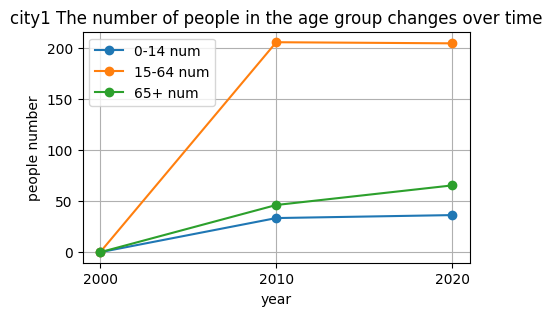

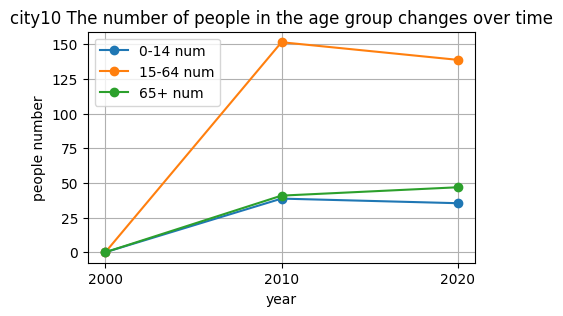

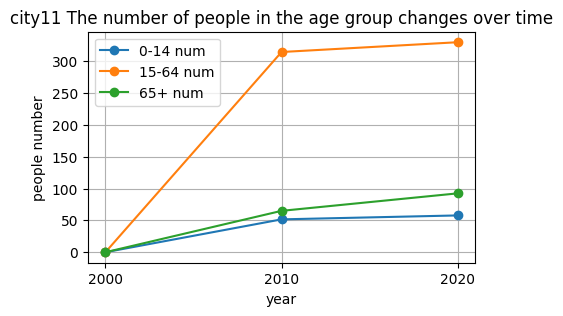

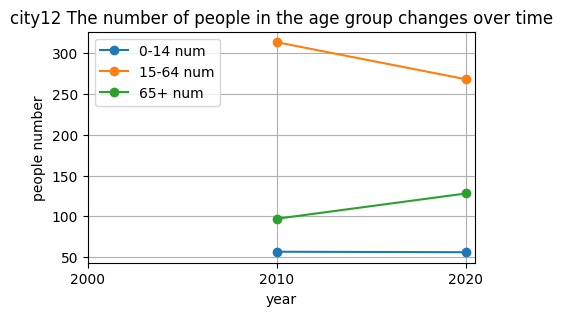

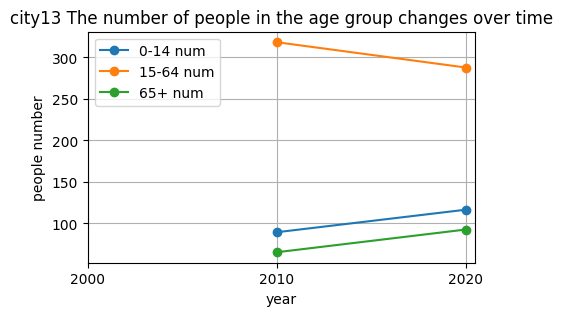

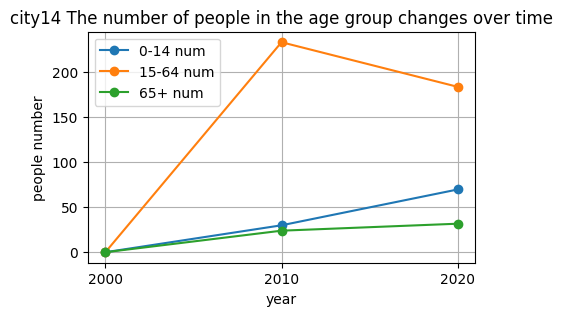

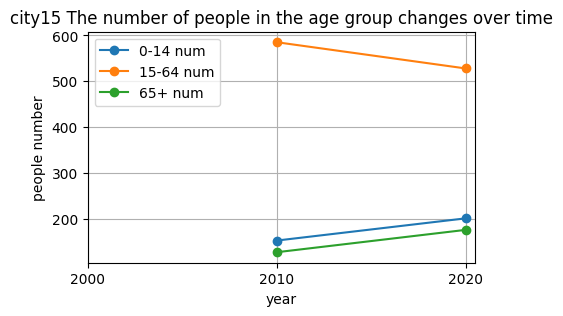

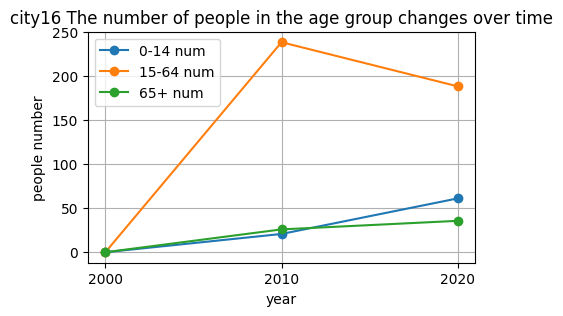

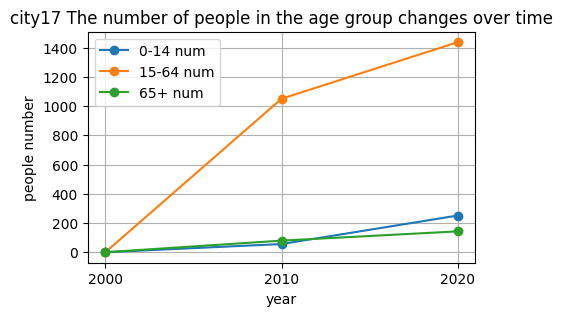

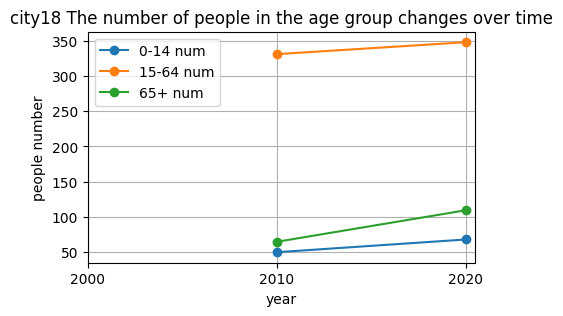

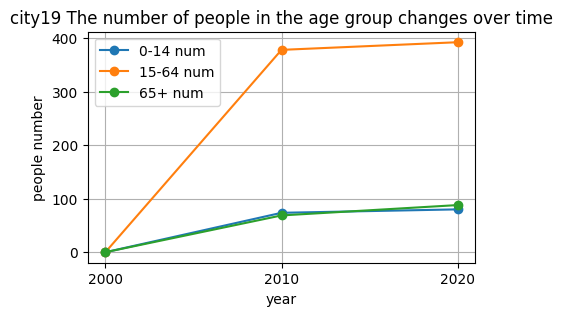

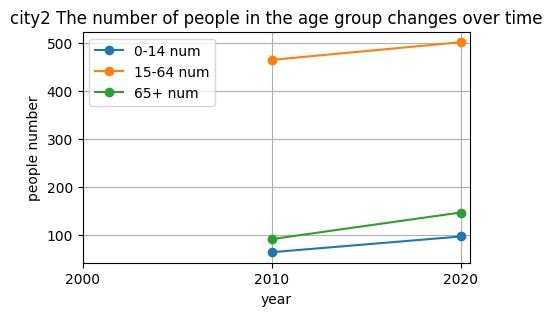

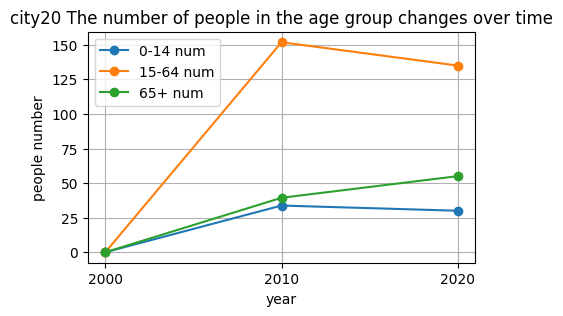

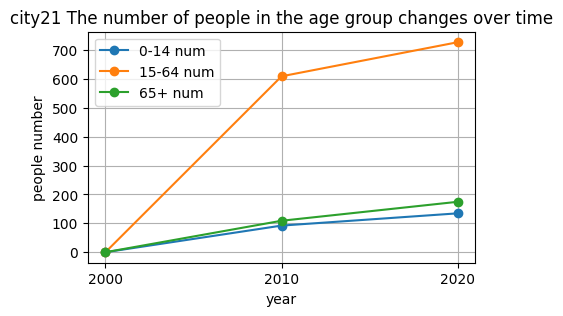

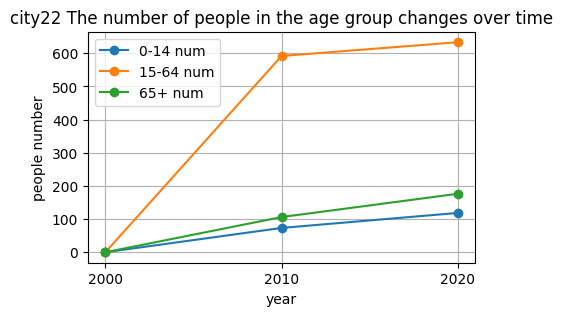

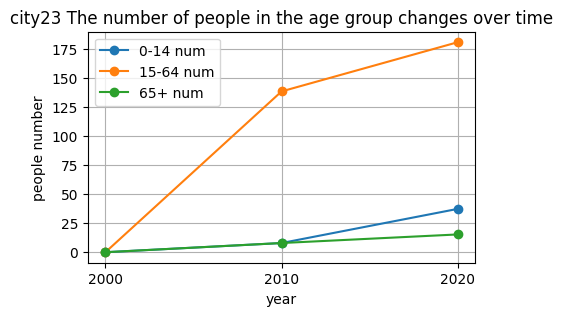

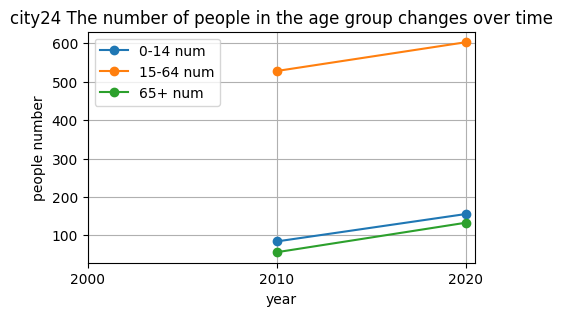

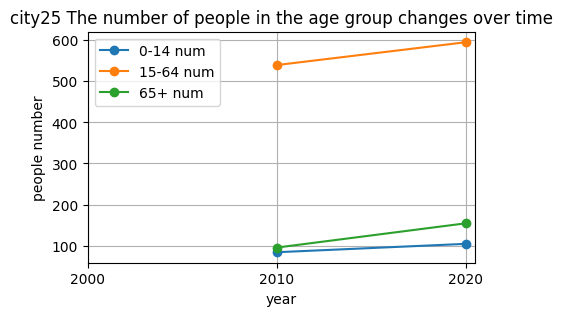

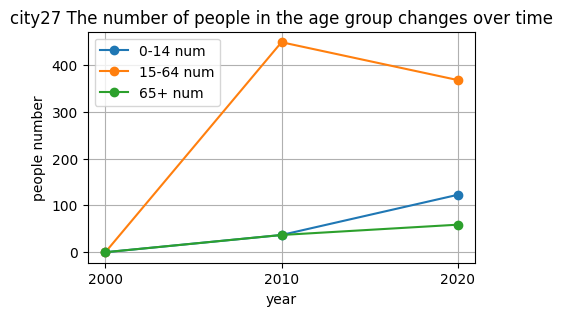

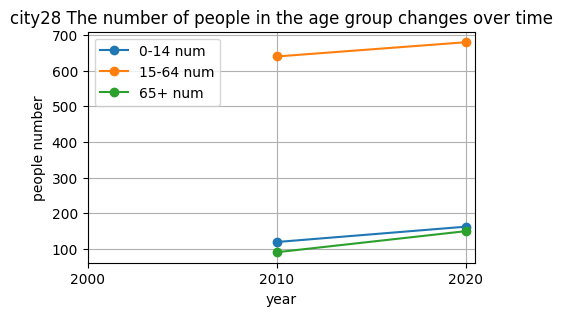

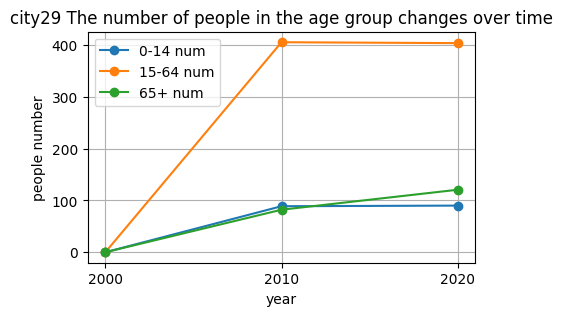

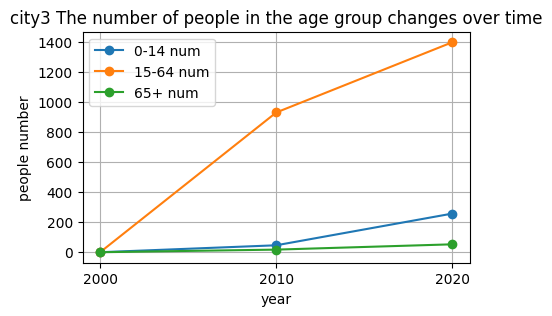

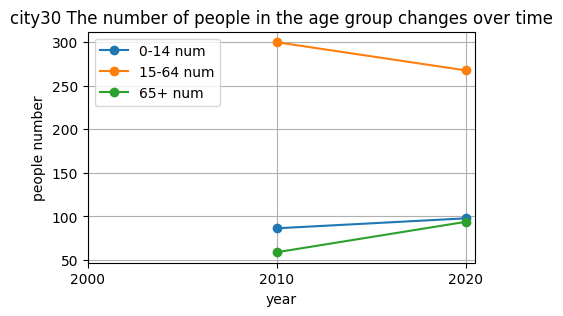

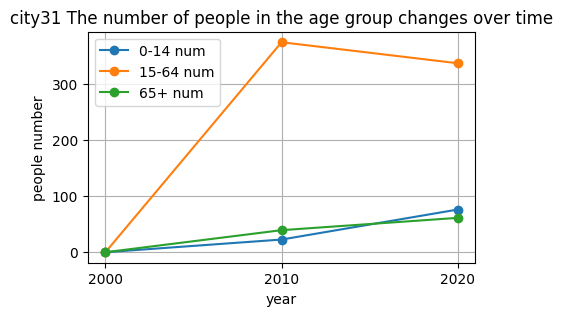

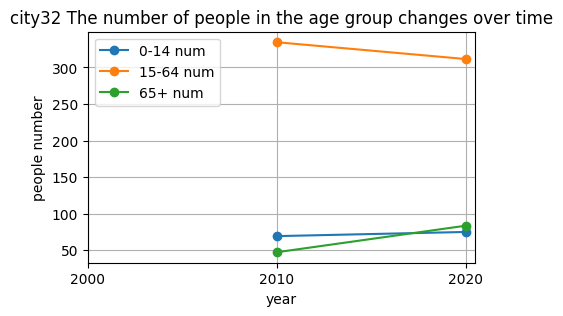

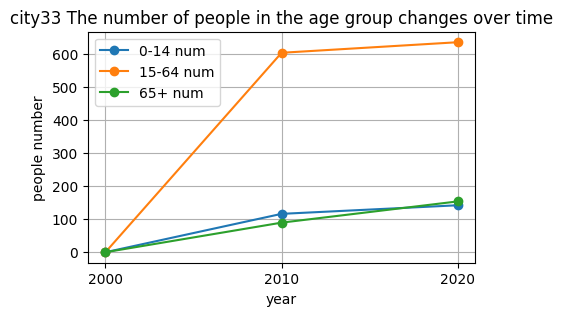

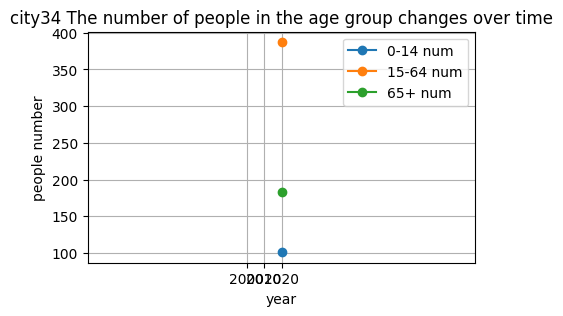

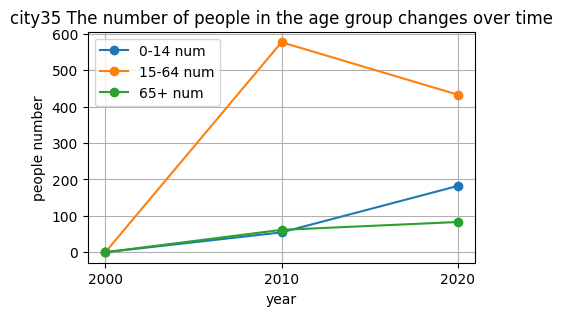

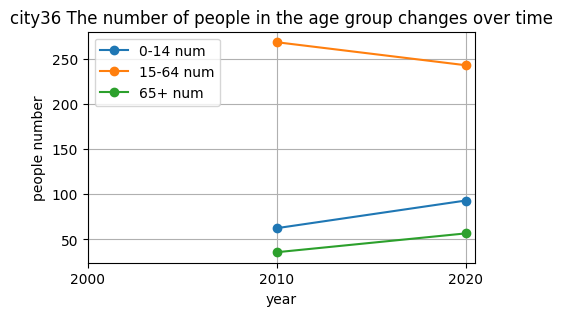

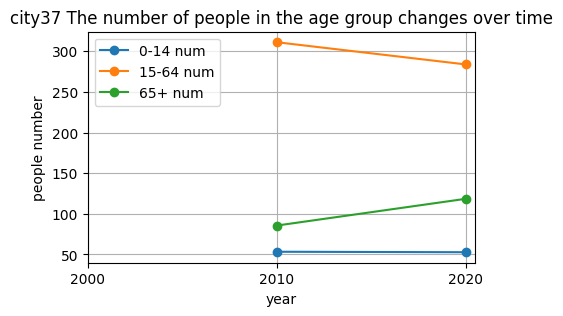

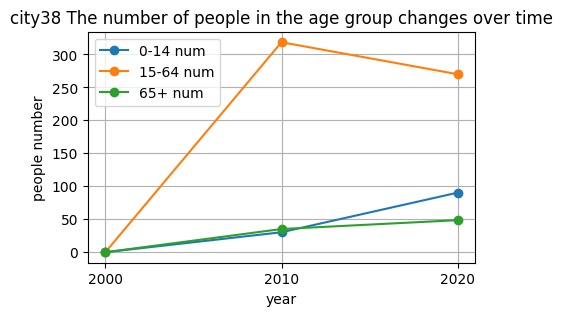

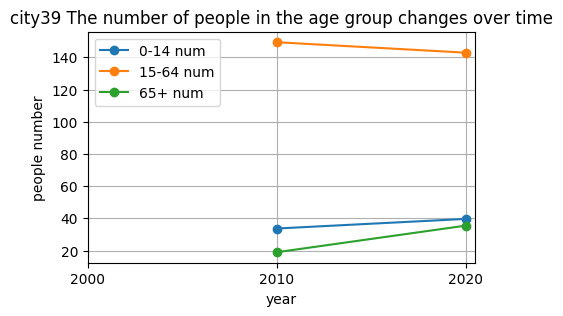

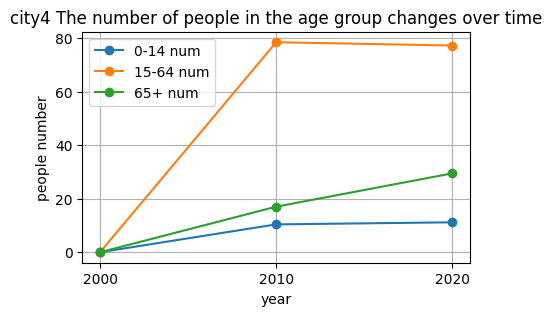

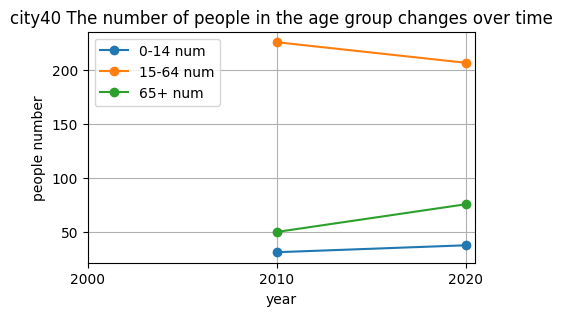

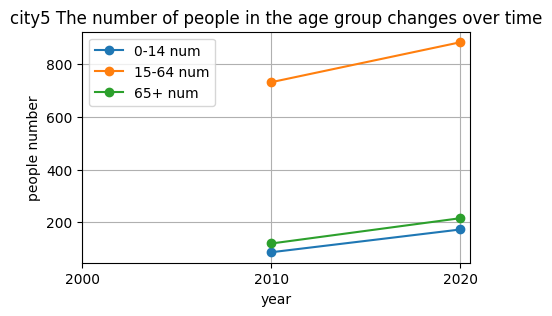

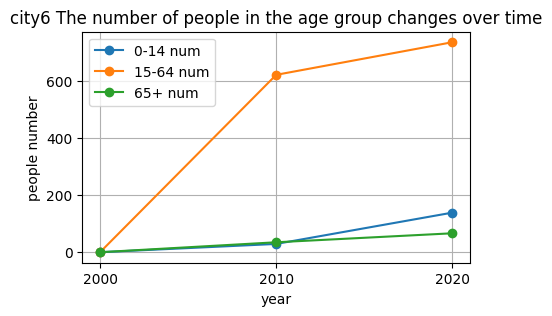

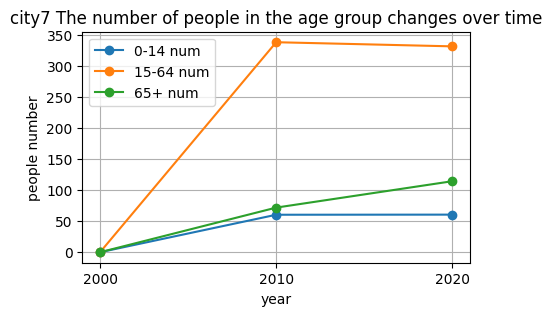

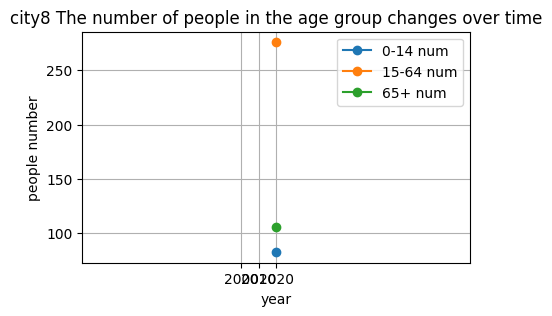

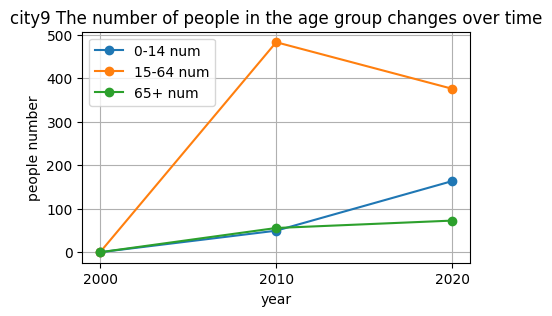

已为每个城市绘制折线图，并保存为PNG文件。


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

age_data = pd.read_csv('age_peoplenum.csv')
cities = age_data['城市'].unique()

for city in cities:
    city_data = age_data[age_data['城市'] == city]

    plt.figure(figsize=(5, 3))
    plt.plot(city_data['年份'], city_data['0-14人数'], marker='o', label='0-14 num')
    plt.plot(city_data['年份'], city_data['15-64人数'], marker='o', label='15-64 num')
    plt.plot(city_data['年份'], city_data['65+人数'], marker='o', label='65+ num')

    plt.title(f'{city} The number of people in the age group changes over time')
    plt.xlabel('year')
    plt.ylabel('people number')
    plt.legend()
    plt.grid(True)

    plt.xticks([2000, 2010, 2020])

    plt.show()

print("已为每个城市绘制折线图，并保存为PNG文件。")
